In [209]:
# Let's load our weapons 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Previously we have scraped the data from the website , but that data doesn't have PM2.5 value , i have downloaded the PM2.5 file from the Kaggle and now we need to merge these two datasets based on the date 


In [210]:
# load our files 

# Raw_Data
df=pd.read_csv("C:/Users/Daya/Desktop/DataSets/AQI/raw_data.csv")


# Raw PM Data
pm=pd.read_csv("C:/Users/Daya/Desktop/DataSets/AQI/city_day.csv")

In [211]:
pm.head()

,City,Date,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket
0,Ahmedabad,2015-01-01,NaN,NaN,0.92,18.22,17.15,NaN,0.92,27.64,133.36,0.00,0.02,0.00,NaN,NaN
1,Ahmedabad,2015-01-02,NaN,NaN,0.97,15.69,16.46,NaN,0.97,24.55,34.06,3.68,5.50,3.77,NaN,NaN
2,Ahmedabad,2015-01-03,NaN,NaN,17.40,19.30,29.70,NaN,17.40,29.07,30.70,6.80,16.40,2.25,NaN,NaN
3,Ahmedabad,2015-01-04,NaN,NaN,1.70,18.48,17.97,NaN,1.70,18.59,36.08,4.43,10.14,1.00,NaN,NaN
4,Ahmedabad,2015-01-05,NaN,NaN,22.10,21.42,37.76,NaN,22.10,39.33,39.31,7.01,18.89,2.78,NaN,NaN


In [212]:
# We are finding the air quality index of Delhi , so lets drop the other city's data 

pm=pm[pm['City']=='Delhi'].reset_index()

pm=pm.reset_index()

pm.shape

(2009, 18)

In [213]:
# Now, out of all the columns , we need only PM2.5 , lets drop others 

pm.drop(['NO','NO2','NOx','NH3','CO','SO2','O3','PM10','City','Benzene','Toluene','Toluene','Xylene','AQI','AQI_Bucket'],axis=1,inplace=True)

In [214]:
# Jan 2015 has some Nan values
pm.head()

,level_0,index,Date,PM2.5
0,0,10229,2015-01-01,313.22
1,1,10230,2015-01-02,186.18
2,2,10231,2015-01-03,87.18
3,3,10232,2015-01-04,151.84
4,4,10233,2015-01-05,146.60


In [215]:
# What is the type of the Date column

pm['Date'].dtype  # Its an Object 

dtype('O')

In [216]:
# We need to convert this object to Datetime 

pm['Date']=pd.to_datetime(pm['Date'])

pm.dtypes

level_0             int64
index               int64
Date       datetime64[ns]
PM2.5             float64
dtype: object

In [217]:
# Lets seperate day,month and year to merge our scraped data 

pm['year'] = pm['Date'].dt.year
pm['month'] = pm['Date'].dt.month
pm['day']=pm['Date'].dt.day

In [218]:
pm.head()

,level_0,index,Date,PM2.5,year,month,day
0,0,10229,2015-01-01,313.22,2015,1,1
1,1,10230,2015-01-02,186.18,2015,1,2
2,2,10231,2015-01-03,87.18,2015,1,3
3,3,10232,2015-01-04,151.84,2015,1,4
4,4,10233,2015-01-05,146.60,2015,1,5


In [219]:
# We no longer required Date column 

pm.drop('Date',axis=1,inplace=True)

pm.dtypes

level_0      int64
index        int64
PM2.5      float64
year         int64
month        int64
day          int64
dtype: object

In [220]:
# Let's MERGE two datasets , but before that lets check whether types are mathcing or not for day,month and year

df.dtypes

Day       int64
T        object
TM       object
Tm       object
SLP      object
H        object
PP       object
VV       object
V        object
VM       object
VG       object
RA       object
SN       object
TS       object
FG       object
year      int64
month     int64
dtype: object

In [221]:
# datatypes are matching but D is upper in Day column 

df.rename(columns={'Day':'day'},inplace=True)

In [222]:
df.head()

,day,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,RA,SN,TS,FG,year,month
0,1,14.9,21.6,8.8,1017.4,76,0,0.8,0.9,7.6,-,NaN,NaN,NaN,o,2015,1
1,2,14.7,21.6,10.2,1018.1,97,5.08,0.6,3.1,9.4,-,o,NaN,NaN,NaN,2015,1
2,3,15,16.8,13.6,1017.5,94,7.11,0.5,0.9,7.6,-,o,NaN,NaN,o,2015,1
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,o,2015,1
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1


In [223]:
print(df.shape)
print(pm.shape)

(2192, 17)
(2009, 6)


In [255]:
# Here we merging the two dataframes , its like JOIN in Sql 

data=pd.merge(df,pm,how='left',on=['year','month','day'])

In [256]:
data.shape

(2192, 20)

In [257]:
data.head()


,day,T,TM,Tm,SLP,H,PP,VV,V,VM,VG,RA,SN,TS,FG,year,month,level_0,index,PM2.5
0,1,14.9,21.6,8.8,1017.4,76,0,0.8,0.9,7.6,-,NaN,NaN,NaN,o,2015,1,0.0,10229.0,313.22
1,2,14.7,21.6,10.2,1018.1,97,5.08,0.6,3.1,9.4,-,o,NaN,NaN,NaN,2015,1,1.0,10230.0,186.18
2,3,15,16.8,13.6,1017.5,94,7.11,0.5,0.9,7.6,-,o,NaN,NaN,o,2015,1,2.0,10231.0,87.18
3,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,o,2015,1,3.0,10232.0,151.84
4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2015,1,4.0,10233.0,146.60


In [258]:
# Now let's drop out all the columns which are no longer required 

data.drop(['day','VG', 'RA','SN', 'TS', 'FG','level_0','index','year','month'],axis=1,inplace=True)

In [259]:
data.head()

,T,TM,Tm,SLP,H,PP,VV,V,VM,PM2.5
0,14.9,21.6,8.8,1017.4,76,0,0.8,0.9,7.6,313.22
1,14.7,21.6,10.2,1018.1,97,5.08,0.6,3.1,9.4,186.18
2,15,16.8,13.6,1017.5,94,7.11,0.5,0.9,7.6,87.18
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,151.84
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,146.60


In [260]:
# Check for NUll values 

data.isnull().sum()

T        1055
TM       1055
Tm       1055
SLP      1055
H        1055
PP       1055
VV       1055
V        1055
VM       1055
PM2.5     185
dtype: int64

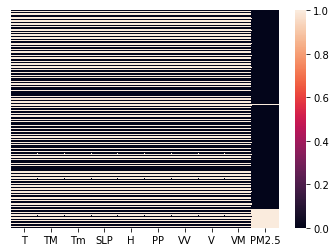

In [261]:
# Visualize the null values 
sns.heatmap(data.isnull(),yticklabels=False)

In [262]:
data.dropna(inplace=True)

In [263]:
data.columns

Index(['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM', 'PM2.5'], dtype='object')

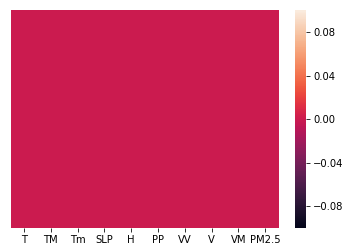

In [264]:
sns.heatmap(data.isnull(),yticklabels=False)

In [266]:
# from the above we can say that none of the column contains null values , but some are values like '-' , we will see those 

cols=['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM']
for col in cols:
    print(col)
    print(" - count {0}".format(data[data[col].str.contains("-")].index) )
    
    if(col=='T'):
        ind=data[data[col].str.contains("-")].index
    

T
 - count Int64Index([ 364,  471,  680,  730,  839,  840, 1095, 1355, 1362, 1416, 1417,
            1418, 1419, 1420, 1421, 1574, 1575, 1577, 1580, 1596, 1597, 1598,
            1599],
           dtype='int64')
TM
 - count Int64Index([ 364,  471,  680,  730,  839,  840, 1095, 1355, 1362, 1416, 1417,
            1418, 1419, 1420, 1421, 1574, 1575, 1577, 1580, 1596, 1597, 1598,
            1599],
           dtype='int64')
Tm
 - count Int64Index([ 364,  471,  680,  730,  839,  840, 1095, 1355, 1362, 1416, 1417,
            1418, 1419, 1420, 1421, 1574, 1575, 1577, 1580, 1596, 1597, 1598,
            1599],
           dtype='int64')
SLP
 - count Int64Index([ 364,  471,  604,  617,  634,  641,  680,  730,  750,  839,  840,
             957, 1095, 1355, 1362, 1389, 1408, 1416, 1417, 1418, 1419, 1420,
            1421, 1430, 1442, 1532, 1574, 1575, 1577, 1580, 1583, 1596, 1597,
            1598, 1599, 1610, 1611, 1636, 1648, 1680, 1698, 1706, 1716, 1729,
            1735, 1748],
           d

### From the above result we can see that some index values are common in all the columsn i.e rows contain only '-' , we can delete those and for the rest we will take average from the previous years

In [267]:
# Dropping where rows contains only '-' values 

data.drop(ind,axis=0,inplace=True)

In [268]:
# After removing the rows with '-' values  
cols=['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM']
for col in cols:
    print(col)
    print(" - count {0}".format(data[data[col].str.contains("-")].index) )
    

T
 - count Int64Index([], dtype='int64')
TM
 - count Int64Index([], dtype='int64')
Tm
 - count Int64Index([], dtype='int64')
SLP
 - count Int64Index([ 604,  617,  634,  641,  750,  957, 1389, 1408, 1430, 1442, 1532,
            1583, 1610, 1611, 1636, 1648, 1680, 1698, 1706, 1716, 1729, 1735,
            1748],
           dtype='int64')
H
 - count Int64Index([], dtype='int64')
PP
 - count Int64Index([  20,   91,  120,  145,  377,  414,  415,  438,  477,  510,  529,
             530,  536,  547,  549,  554,  559,  560,  561,  573,  578,  579,
             586,  590,  591,  602,  603,  608,  622,  737,  755,  756,  757,
             797,  798,  853,  869,  871,  881,  888,  889,  900,  901,  902,
             913,  926,  930,  931,  936,  942,  943,  949,  961,  967,  968,
             969,  973,  974,  975, 1071, 1516, 1736, 1876],
           dtype='int64')
VV
 - count Int64Index([], dtype='int64')
V
 - count Int64Index([], dtype='int64')
VM
 - count Int64Index([226, 274, 275, 318, 623,

In [269]:
# Three columns namely SLP , PP , VM still contains '-' , we will remove these instead of taking average


cols=['SLP','PP','VM']


for col in cols:
    
    temp_index=data[data[col].str.contains('-')].index
    
    data.drop(temp_index,axis=0,inplace=True)



In [270]:
# After removing the rows with '-' values  
cols=['T', 'TM', 'Tm', 'SLP', 'H', 'PP', 'VV', 'V', 'VM']
for col in cols:
    print(col)
    print(" - count {0}".format(data[data[col].str.contains("-")].index) )
    

T
 - count Int64Index([], dtype='int64')
TM
 - count Int64Index([], dtype='int64')
Tm
 - count Int64Index([], dtype='int64')
SLP
 - count Int64Index([], dtype='int64')
H
 - count Int64Index([], dtype='int64')
PP
 - count Int64Index([], dtype='int64')
VV
 - count Int64Index([], dtype='int64')
V
 - count Int64Index([], dtype='int64')
VM
 - count Int64Index([], dtype='int64')


In [252]:
data.shape

(924, 13)

In [273]:
data.dtypes

T         object
TM        object
Tm        object
SLP       object
H         object
PP        object
VV        object
V         object
VM        object
PM2.5    float64
dtype: object

In [274]:
for col in data.columns[:-1]:
    data[col]=pd.to_numeric(data[col])

# Correlation Matrix with Heatmap
Correlation states how the features are related to each other or the target variable.

Correlation can be positive (increase in one value of feature increases the value of the target variable) or negative (increase in one value of feature decreases the value of the target variable)

Heatmap makes it easy to identify which features are most related to the target variable, we will plot heatmap of correlated features using the seaborn library.

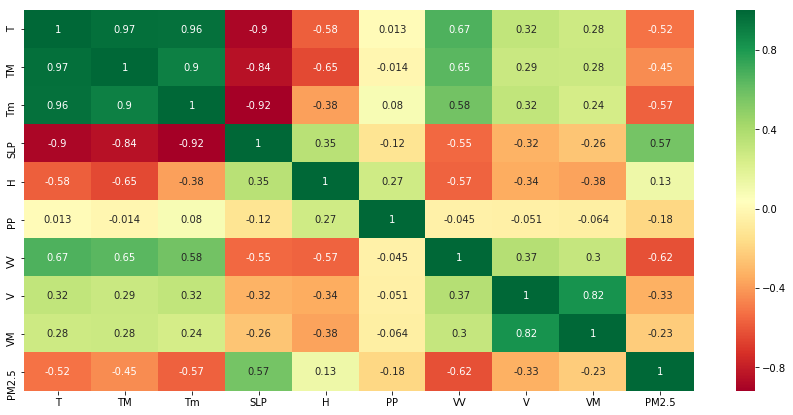

In [276]:
corr=data.corr()

plt.figure(figsize=(15,7))
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,annot=True,cmap='RdYlGn')

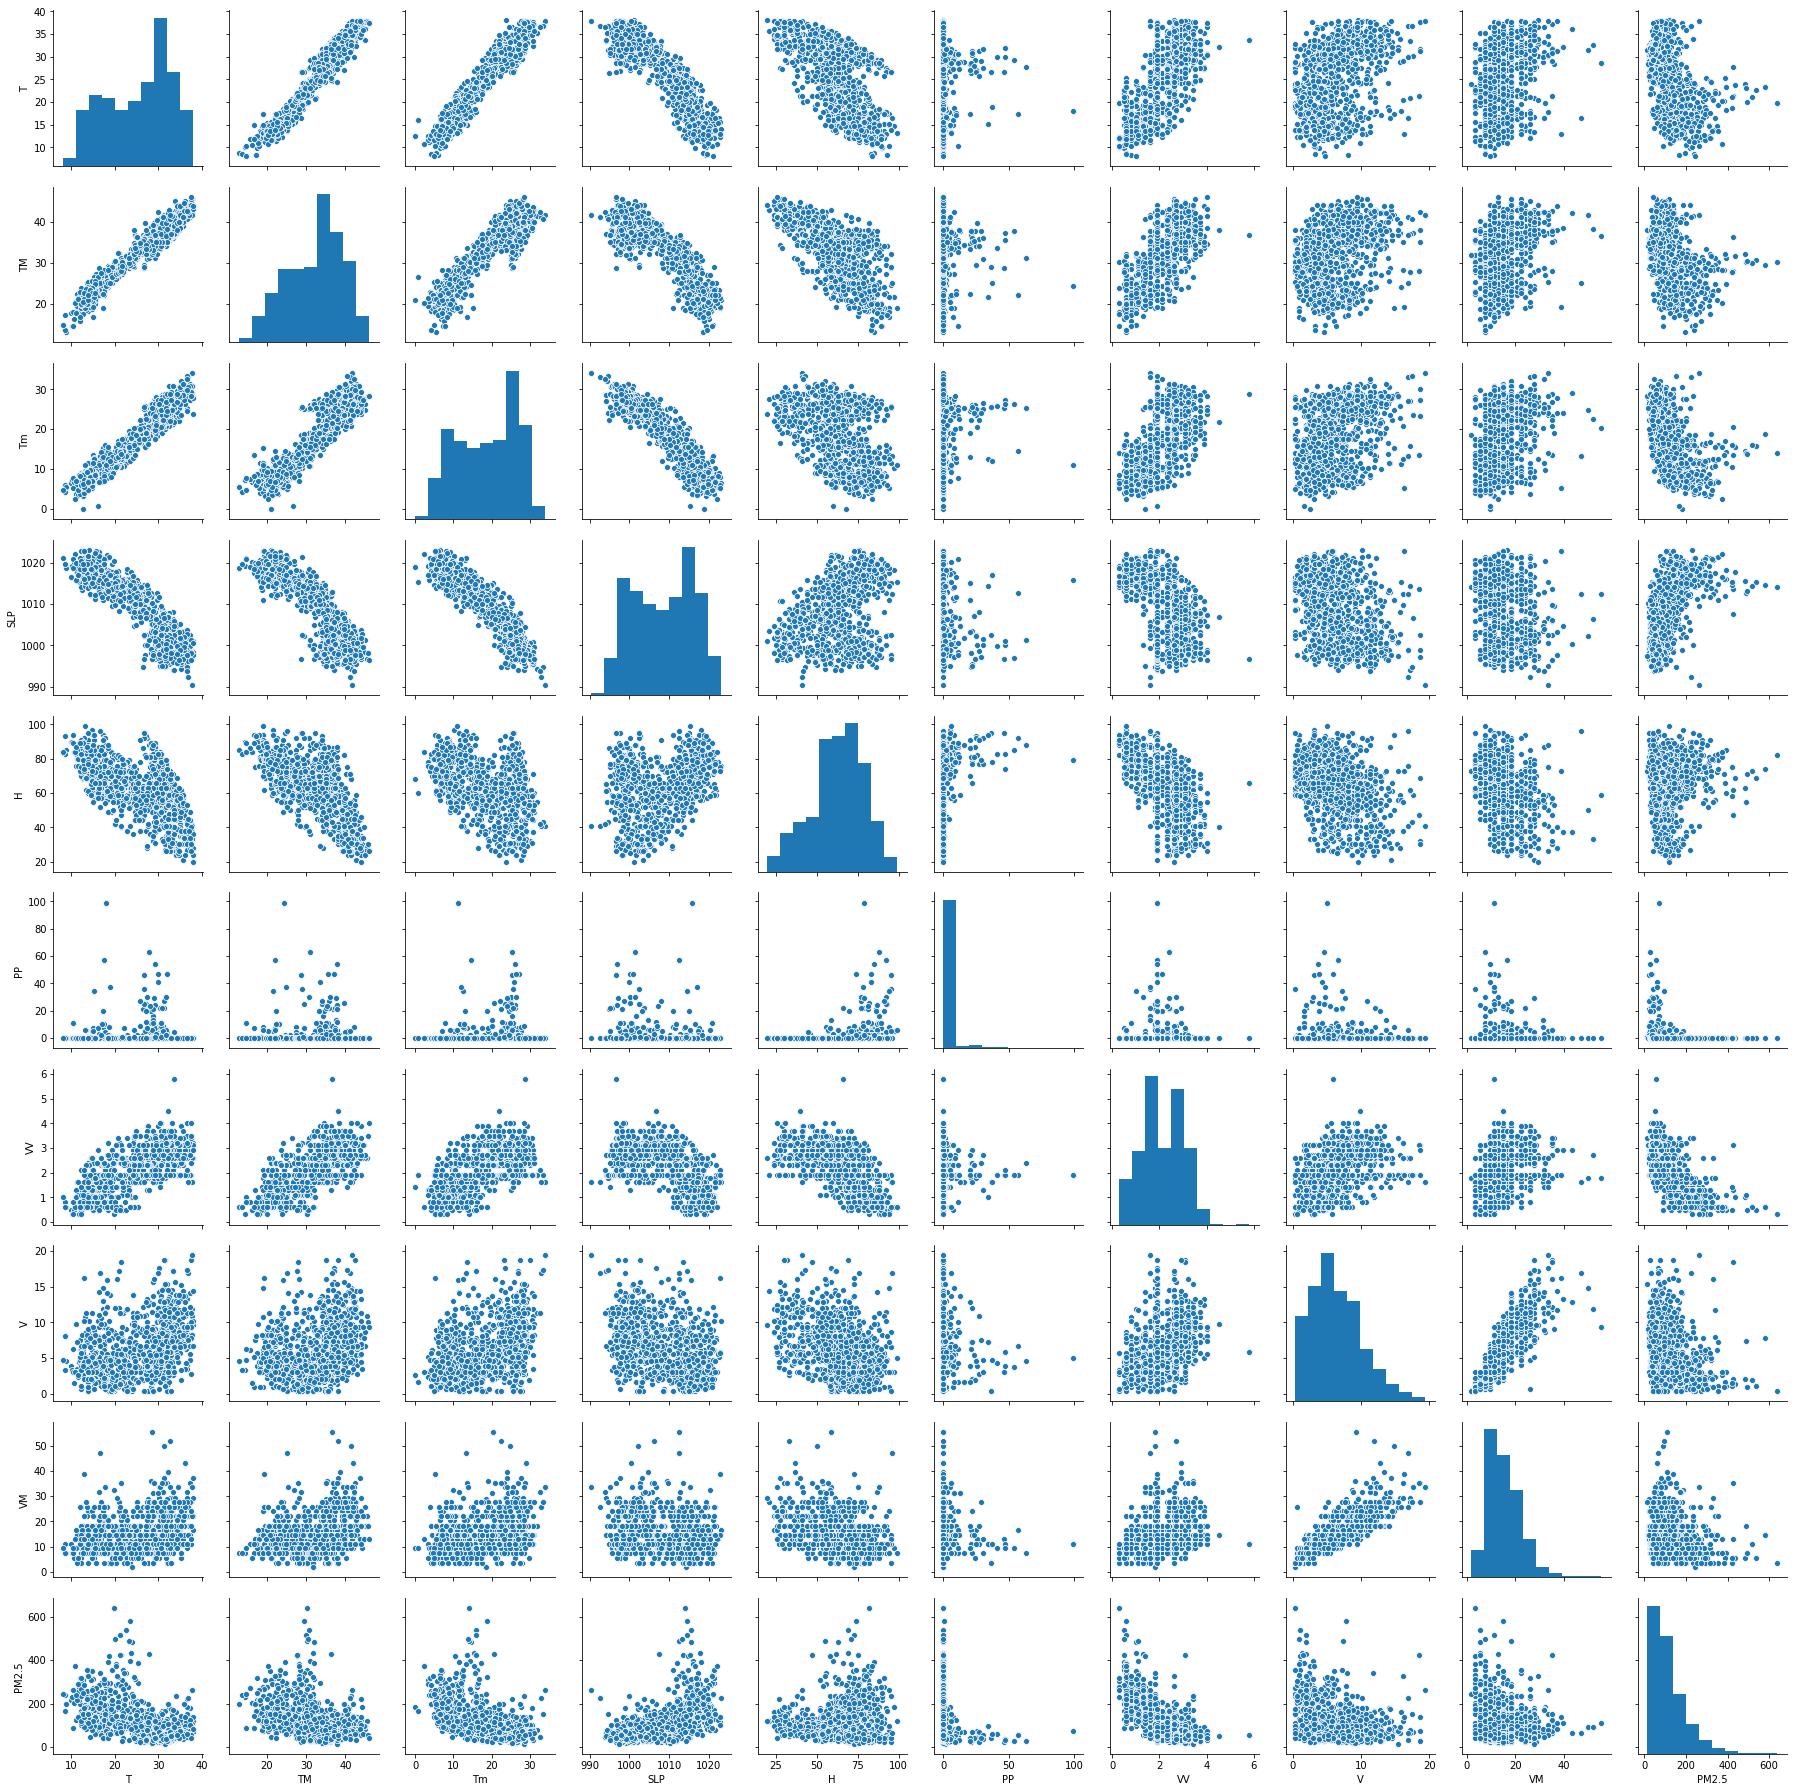

In [278]:
# Lets have a look at how each feature is related with others by plotting pairplot

sns.pairplot(data)



In [279]:
# Skewness of the data

data.skew()

T       -0.345179
TM      -0.408939
Tm      -0.260984
SLP     -0.093343
H       -0.397108
PP       7.279859
VV      -0.079592
V        0.676400
VM       1.196657
PM2.5    1.774677
dtype: float64

### Visualizing the skewness of the data 

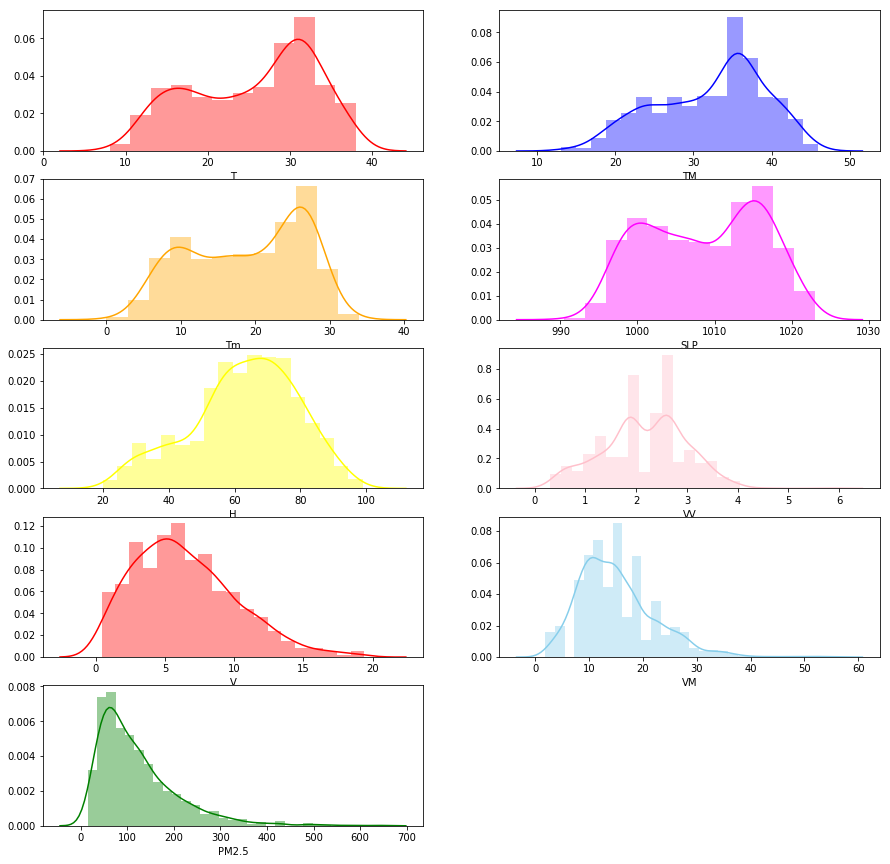

In [281]:
#plt.figure(figsize = (15,15)
fig,ax=plt.subplots(5,2,figsize = (15,15))
fig.delaxes(ax[4][1]) # TO delete the extra one
sns.distplot(data["T"],kde=True,ax=ax[0,0],color="red")
sns.distplot(data["TM"],kde=True,ax=ax[0,1],color="blue")
sns.distplot(data["Tm"],kde=True,ax=ax[1,0],color="orange")
sns.distplot(data["SLP"],kde=True,ax=ax[1,1],color="magenta")
sns.distplot(data["H"],kde=True,ax=ax[2,0],color="yellow")
sns.distplot(data["VV"],kde=True,ax=ax[2,1],color="pink")
sns.distplot(data["V"],kde=True,ax=ax[3,0],color='red')
sns.distplot(data["VM"],kde=True,ax=ax[3,1],color="skyblue")
sns.distplot(data["PM2.5"],kde=True,ax=ax[4,0],color="green")

In [282]:
from sklearn.preprocessing import MinMaxScaler

scaler=MinMaxScaler()

In [283]:
data[data.columns[:-1]]=scaler.fit_transform(data[data.columns[:-1]])

In [284]:
# After Normalizing the data 

data.skew()

T       -0.345179
TM      -0.408939
Tm      -0.260984
SLP     -0.093343
H       -0.397108
PP       7.279859
VV      -0.079592
V        0.676400
VM       1.196657
PM2.5    1.774677
dtype: float64

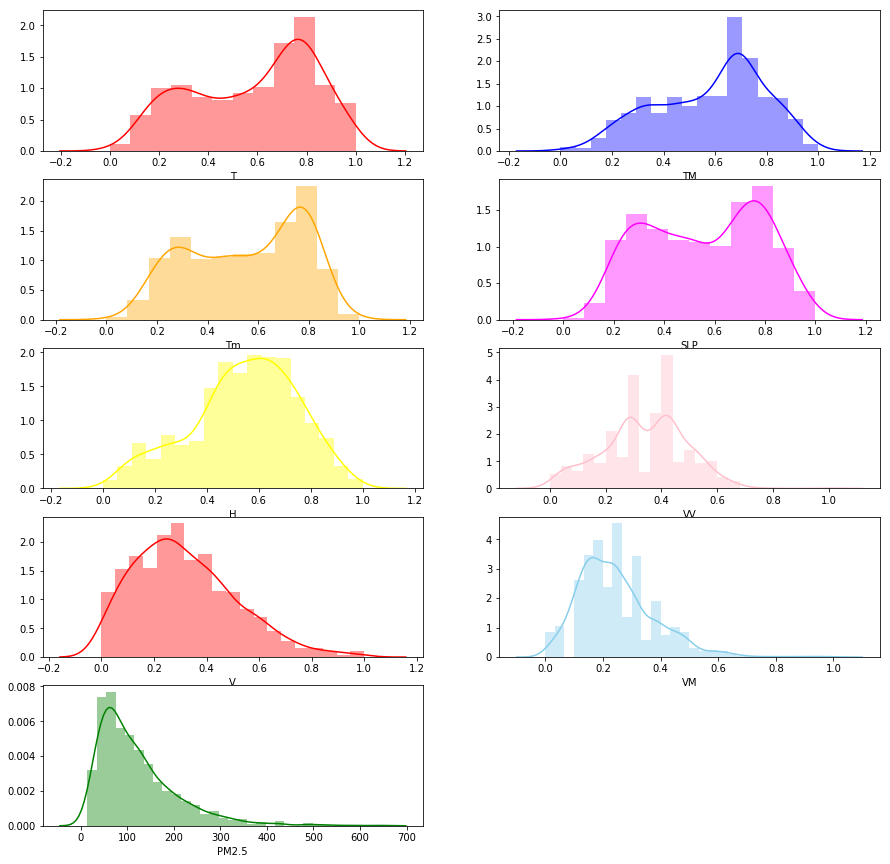

In [285]:
#plt.figure(figsize = (15,15)
fig,ax=plt.subplots(5,2,figsize = (15,15))
fig.delaxes(ax[4][1]) # TO delete the extra one
sns.distplot(data["T"],kde=True,ax=ax[0,0],color="red")
sns.distplot(data["TM"],kde=True,ax=ax[0,1],color="blue")
sns.distplot(data["Tm"],kde=True,ax=ax[1,0],color="orange")
sns.distplot(data["SLP"],kde=True,ax=ax[1,1],color="magenta")
sns.distplot(data["H"],kde=True,ax=ax[2,0],color="yellow")
sns.distplot(data["VV"],kde=True,ax=ax[2,1],color="pink")
sns.distplot(data["V"],kde=True,ax=ax[3,0],color='red')
sns.distplot(data["VM"],kde=True,ax=ax[3,1],color="skyblue")
sns.distplot(data["PM2.5"],kde=True,ax=ax[4,0],color="green")

In [288]:
# Now our data is ready to feed to the model 

#data.to_csv("C:/Users/Daya/Desktop/DataSets/AQI/final_data.csv",index=False)